Basic Steps Involved inthis Project:

1. Gather the Heart Data
2. Data Preprocessing 
3. Train Test Split (3:1) or (75, 25)
4. Logistic Regression Model
5. Test the model with Test(new data) 
6. Healthy or Not

Data Analysis:

Angina: a symptom of reduced blood flow to the heart muscle
Target (0/1)  : 0->Healthy, 1-> UnHealthy


Importing the Required Libraries :

In [262]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection and Processing

In [265]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [267]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [269]:
# Print the first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [271]:
# Print the last 5 rows of hte dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [273]:
# Shape Of hte Data(Rows, Columns)
heart_data.shape

(303, 14)

In [275]:
# Get the some info about the data
# Non-null : There is no value is missing
# Dtype    : Type of the data

# Find the Missing Values :

In [278]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<!-- Checking for hte MIssing Values:
NOTE : No Value is missing
We Can Handle the Missing values(Imputations) with Mean/Median/Mode -->

In [281]:
heart_data.isnull().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [283]:
# Statistical Measures of the data(Insights):
# Count : The No.of Datapoints 
# Means : Mean of the all the columns(attributes)
# 25%   : There are 25% Value less than 47.5

# Find the Duplicate Values : 

In [286]:
data_dup = heart_data.duplicated().any().sum()

In [288]:
data_dup

1

In [290]:
heart_data = heart_data.drop_duplicates()

In [292]:
data_dup = heart_data.duplicated().any()

In [294]:
data_dup 

False

# Data Processing :

Partioning the data into categorical and Numerical data

In [364]:
cate_val =[]
num_val = []
for column in heart_data.columns:
    if heart_data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        num_val.append(column)

In [366]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [368]:
num_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

statistical measures about the data 

In [297]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [299]:
# Checking the Distribution of the target Varible :
# NOTE : The d/f is less it's doesn't require the preprossing
# 1 -> defect
# 0 -> Healthy

In [301]:
heart_data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

# Splitting the Features and Target:
NOTE : use axis = 1 for coumns where as 0 for rows:

In [304]:
X = heart_data.drop(columns='target', axis=1)
y = heart_data['target']
print(X)
print(X.shape)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [306]:
print(y)  # Target Column

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64


# Splitting the Data into training & test data

Note : test-size=0.2 => 20% of the test data

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=2)

In [312]:
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(302, 13) (241, 13) (61, 13)
(302,) (241,) (61,)


# Model Training :

# Logistic Regression  : Best for the binary classifiacation

In [575]:
model = LogisticRegression()

Training the LogisticRegression model with training data

In [578]:
model.fit(X_train, y_train)

C:\Users\mahes\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evalution

In [590]:
# Accuracy SCore :
# How well the model is predicted for out of 100

In [592]:
# Accuracy on training data:
X_train_prediction = model.predict(X_train)
training_data_accuracy1 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy1)

Accuracy on the training Data : 0.8506224066390041


In [594]:
# Accuracy on the test Data:
X_test_prediction = model.predict(X_test)
test_data_accuracy1 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy1)

Accuracy on the Test Data : 0.819672131147541


NOTE : TRA = 85% is not bad and we can increase the TRA using the large DS
and it is not over or under fitted bcz the d/f b/t TRA and TA is less

# Build the Predictive System :

Predict for the new values by giving the features not targets

In [599]:
input_data = 63,1,3,145,233,1,0,150,0,2.3,0,0,1

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


C:\Users\mahes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# SVC

In [602]:
from sklearn import svm

In [604]:
svm = svm.SVC()

In [606]:
svm.fit(X_train, y_train)

SVC()

In [608]:
# Accuracy on training data:
X_train_prediction = svm.predict(X_train)
training_data_accuracy2 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy2)

Accuracy on the training Data : 0.6721991701244814


In [610]:
# Accuracy on the test Data:
X_test_prediction = svm.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy2)

Accuracy on the Test Data : 0.6229508196721312


# KNN Classifier:

In [613]:
from sklearn.neighbors import KNeighborsClassifier

In [615]:
# By defaul n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=5)

In [617]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [619]:
# Accuracy on training data:
X_train_prediction = knn.predict(X_train)
training_data_accuracy3 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy3)

Accuracy on the training Data : 0.7759336099585062


In [621]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy3 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy3)

Accuracy on the Test Data : 0.639344262295082


# Non - Linear ML Algorithms:

In [625]:
# Decision Tree Classifier

In [627]:
from sklearn.tree import DecisionTreeClassifier

In [629]:
dt = DecisionTreeClassifier()

In [631]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [633]:
y_pred = dt.predict(X_test)  # Short way

In [635]:
accuracy_score(y_test, y_pred)

0.7377049180327869

In [637]:
# Accuracy on training data:
X_train_prediction = dt.predict(X_train)
training_data_accuracy4 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy4)

Accuracy on the training Data : 1.0


In [639]:
X_test_prediction = dt.predict(X_test)
test_data_accuracy4 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy4)

Accuracy on the Test Data : 0.7377049180327869


In [641]:
# random Forest Classifier :

In [643]:
from sklearn.ensemble import RandomForestClassifier

In [645]:
rf = RandomForestClassifier()

In [647]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [649]:
# Accuracy on training data:
X_train_prediction = rf.predict(X_train)
training_data_accuracy5 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy5)

Accuracy on the training Data : 1.0


In [651]:
# Accuracy on the test Data:
X_test_prediction = rf.predict(X_test)
test_data_accuracy5 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy5)

Accuracy on the Test Data : 0.8032786885245902


In [653]:
# Gradient Boosting Classifier :

In [655]:
from sklearn.ensemble import GradientBoostingClassifier

In [657]:
gbc = GradientBoostingClassifier()

In [659]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [661]:
# Accuracy on training data:
X_train_prediction = gbc.predict(X_train)
training_data_accuracy6 = accuracy_score(X_train_prediction, y_train)
print("Accuracy on the training Data :",training_data_accuracy6)

Accuracy on the training Data : 0.995850622406639


In [676]:
# Accuracy on the test Data:
X_test_prediction = gbc.predict(X_test)
test_data_accuracy6 = accuracy_score(X_test_prediction, y_test)
print("Accuracy on the Test Data :", test_data_accuracy6)

Accuracy on the Test Data : 0.7868852459016393


In [690]:
# Drawing Bar PLot for different Models 

In [692]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC': [training_data_accuracy1,
                            training_data_accuracy2,
                            training_data_accuracy3,
                            training_data_accuracy4,
                            training_data_accuracy5,
                            training_data_accuracy6]})

In [694]:
final_data

,Models,ACC
0,LR,0.850622
1,SVC,0.672199
2,KNN,0.775934
3,DT,1.000000
4,RF,1.000000
5,GBC,0.995851


In [710]:
import seaborn as sns
import matplotlib.pyplot as plt

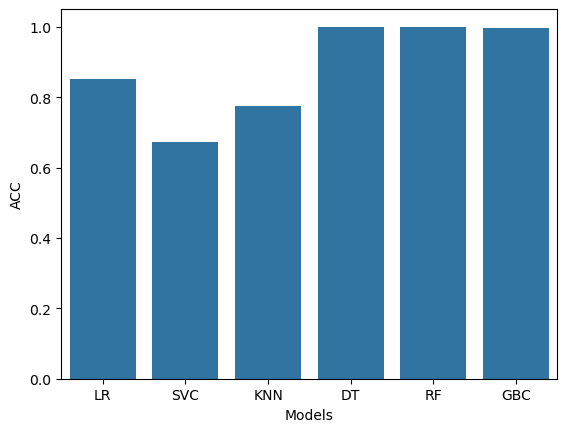

In [753]:
sns.barplot(x=final_data['Models'], y=final_data['ACC'])
plt.show()

In [767]:
final_test_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC': [test_data_accuracy1,
                            test_data_accuracy2,
                            test_data_accuracy3,
                            test_data_accuracy4,
                            test_data_accuracy5,
                            test_data_accuracy6]})

In [769]:
final_test_data

,Models,ACC
0,LR,0.819672
1,SVC,0.622951
2,KNN,0.639344
3,DT,0.737705
4,RF,0.803279
5,GBC,0.786885


<Axes: xlabel='Models', ylabel='ACC'>

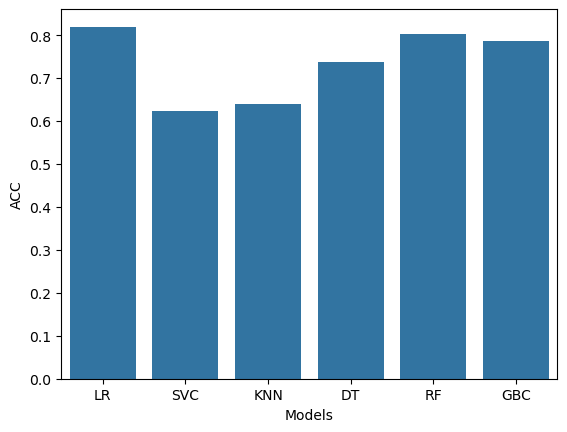

In [771]:
import seaborn as sns
sns.barplot(x=final_test_data['Models'], y=final_test_data['ACC'])

# Save Model Using Joblib

pickle is a module from the Python Standard Library. It can serialize and deserialize any Python object, including custom Python classes and objects. joblib is more efficient than pickle when working with large machine learning models or large numpy arrays.

In [757]:
import joblib

In [773]:
joblib.dump(model, 'model_joblib_heart')

['model_joblib_heart']

In [775]:
model = joblib.load('model_joblib_heart')

In [781]:
model.predict(np.array([63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]).reshape(1, -1))

C:\Users\mahes\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [6]:
# GUI

In [8]:
from tkinter import *
import joblib

In [10]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()